In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np
import env
import matplotlib.pyplot as plt
import os
import prepare
import acquire
import seaborn as sns
import explore
from math import sqrt

In [2]:
df = acquire.get_zillow_sfr_data()

In [3]:
df.head()

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,transactiondate
0,0,4.0,2.0,1696.0,252549.0,1960.0,6037.0,2017-01-13
1,1,3.0,2.0,1470.0,512000.0,1957.0,6037.0,2017-01-13
2,2,3.0,2.0,1450.0,229856.0,1957.0,6037.0,2017-01-13
3,3,3.0,2.0,1694.0,294026.0,1957.0,6037.0,2017-01-13
4,4,4.0,3.0,2578.0,426407.0,1963.0,6037.0,2017-01-13


In [4]:
df.shape

(56079, 8)

In [5]:
train, val, test = prepare.clean_prep_zillow(df)

In [6]:
train.shape

(38619, 6)

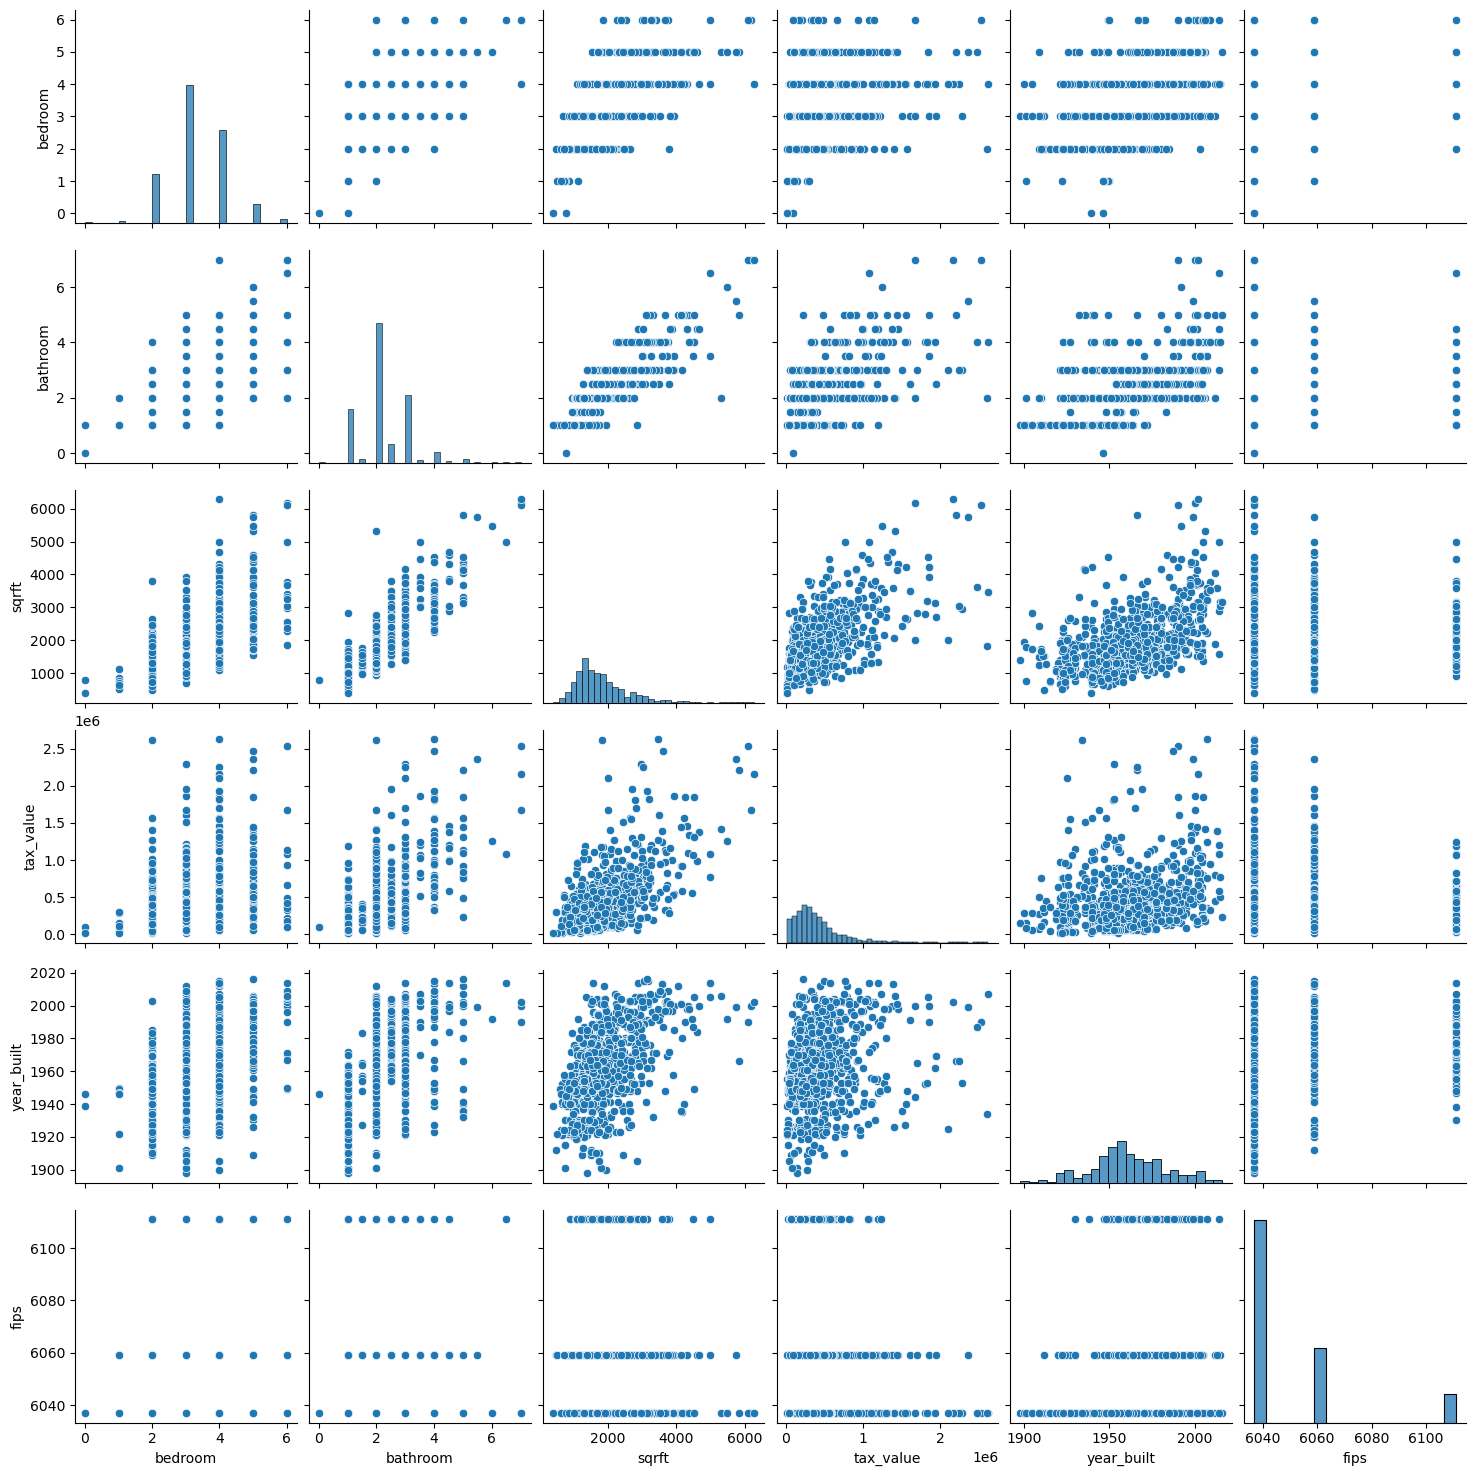

In [7]:
sns.pairplot(train.sample(1000))

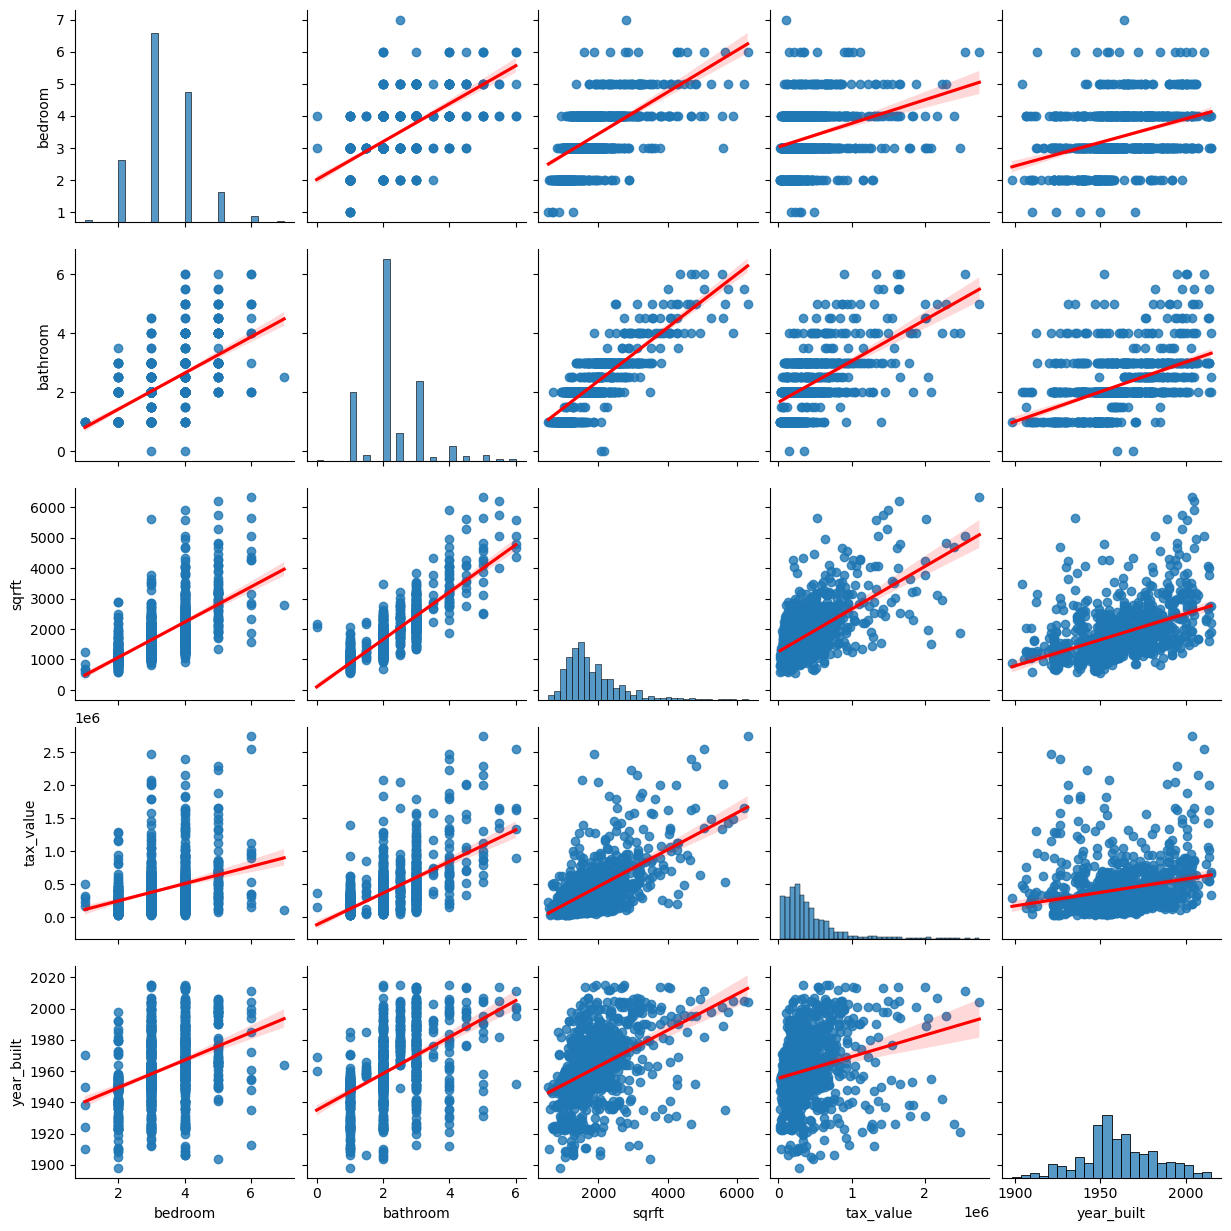

,bedroom,bathroom,sqrft,tax_value,year_built
12391,2.0,2.0,1254.0,241072.0,1953.0
8583,4.0,3.0,2348.0,301613.0,1974.0
25946,3.0,1.0,1200.0,383146.0,1912.0
39044,4.0,3.0,1934.0,287756.0,1980.0
26499,4.0,4.0,3102.0,923657.0,1962.0
...,...,...,...,...,...
8409,3.0,2.0,1201.0,57360.0,1957.0
5496,3.0,2.0,1213.0,109250.0,1946.0
17353,4.0,3.0,2522.0,1400570.0,1950.0
11791,4.0,2.0,1590.0,292109.0,1964.0


In [8]:
explore.plot_variable_pairs(train.sample(1000))

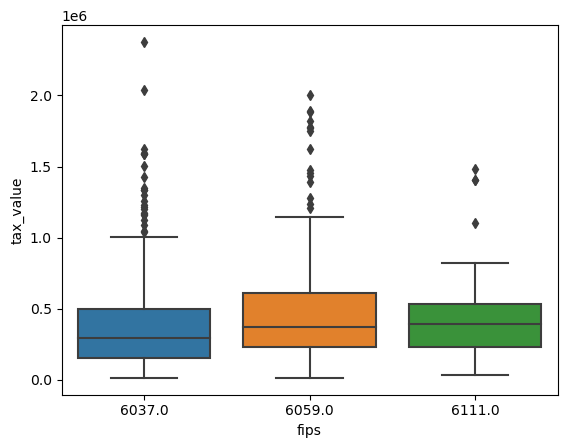

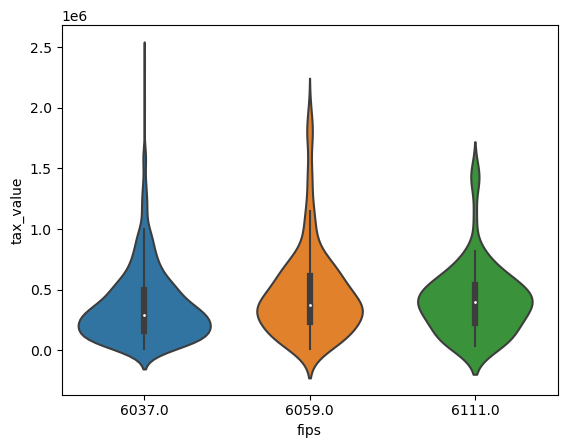

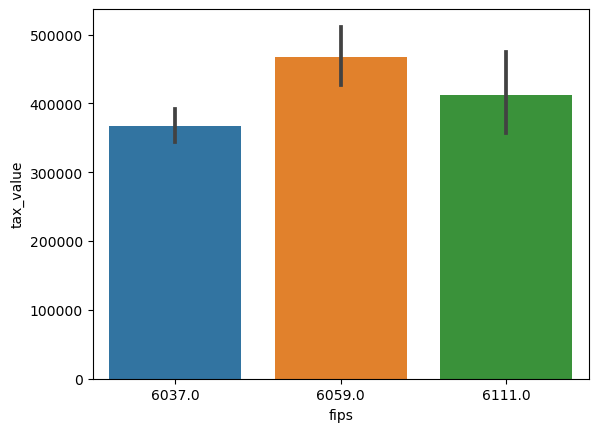

,bedroom,bathroom,sqrft,tax_value,year_built,fips
328,2.0,1.0,865.0,229107.0,1953.0,6037.0
28758,3.0,2.0,1140.0,132668.0,1956.0,6037.0
30875,3.0,2.0,1488.0,386067.0,1970.0,6059.0
44736,3.0,2.0,1877.0,812199.0,1951.0,6037.0
41615,4.0,3.0,2587.0,776591.0,1995.0,6059.0
...,...,...,...,...,...,...
15917,4.0,1.5,1016.0,114313.0,1953.0,6059.0
42083,2.0,2.5,2782.0,1885670.0,2014.0,6059.0
26626,0.0,0.0,881.0,121159.0,1928.0,6037.0
8324,5.0,3.5,2811.0,733565.0,1996.0,6059.0


In [9]:
explore.plot_categorical_and_continuous(train.sample(1000), 'fips', 'tax_value')

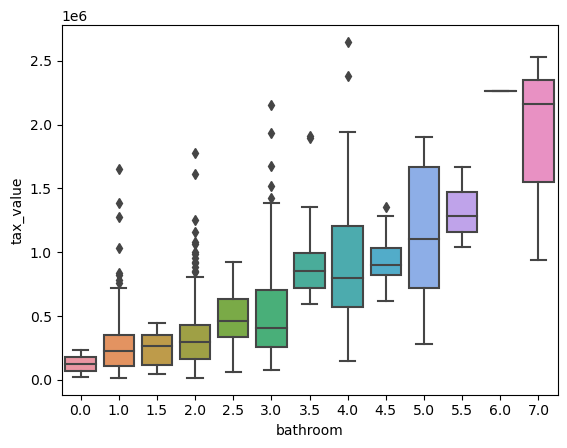

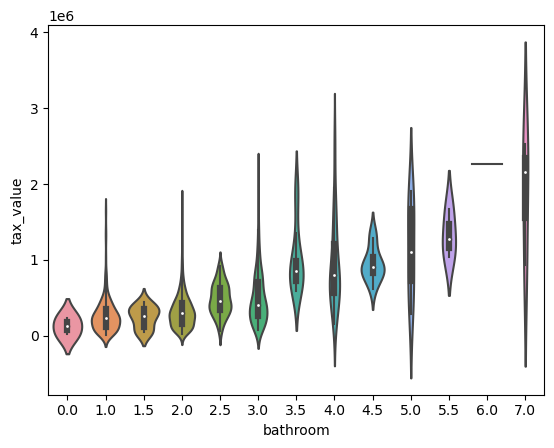

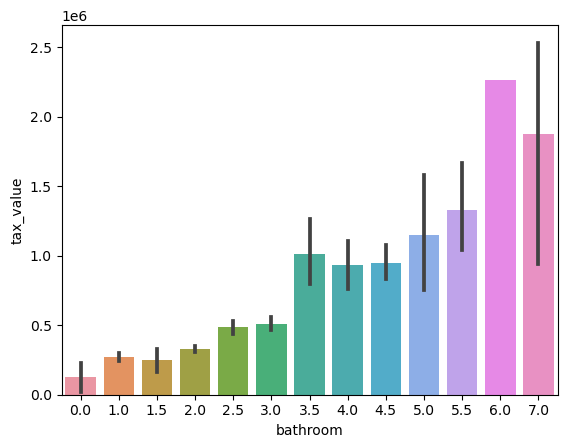

,bedroom,bathroom,sqrft,tax_value,year_built,fips
14773,2.0,1.0,1032.0,533979.0,1924.0,6037.0
52339,5.0,5.0,3421.0,281384.0,2006.0,6037.0
25094,2.0,1.0,1369.0,420372.0,1929.0,6037.0
5978,4.0,3.0,2984.0,559700.0,1964.0,6037.0
37730,2.0,2.0,1015.0,656025.0,1947.0,6037.0
...,...,...,...,...,...,...
43803,3.0,2.0,1332.0,75646.0,1952.0,6037.0
7627,3.0,2.0,2300.0,147463.0,1971.0,6059.0
51281,4.0,3.0,2810.0,782322.0,1956.0,6037.0
19110,4.0,3.0,2908.0,687360.0,1998.0,6059.0


In [10]:
explore.plot_categorical_and_continuous(train.sample(1000), 'bathroom', 'tax_value')

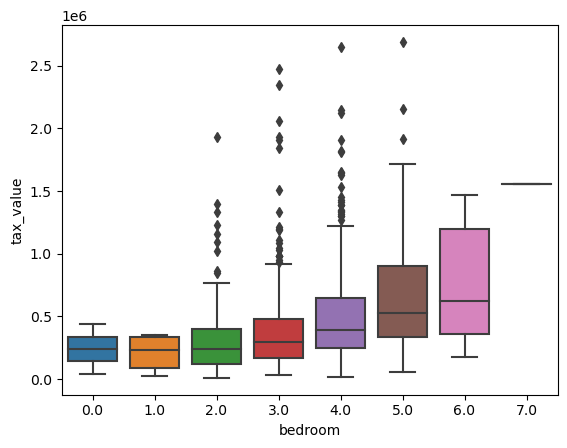

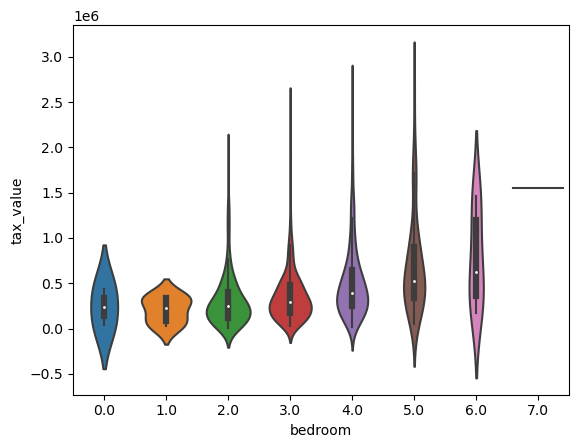

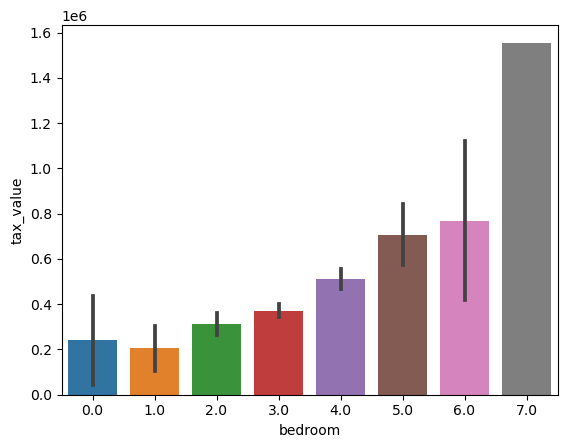

,bedroom,bathroom,sqrft,tax_value,year_built,fips
27506,3.0,2.0,1110.0,222742.0,1979.0,6037.0
19392,3.0,3.0,2039.0,295899.0,1983.0,6059.0
53663,3.0,1.0,1733.0,144892.0,1953.0,6059.0
31633,4.0,3.0,1975.0,342305.0,1967.0,6059.0
44526,4.0,4.0,2699.0,690000.0,1959.0,6037.0
...,...,...,...,...,...,...
17769,4.0,4.0,2933.0,1450000.0,1998.0,6037.0
6528,3.0,2.0,1450.0,280122.0,1954.0,6037.0
18960,4.0,3.0,3347.0,555795.0,1980.0,6059.0
5476,4.0,2.0,1200.0,269465.0,1955.0,6037.0


In [11]:
explore.plot_categorical_and_continuous(train.sample(1000), 'bedroom', 'tax_value')

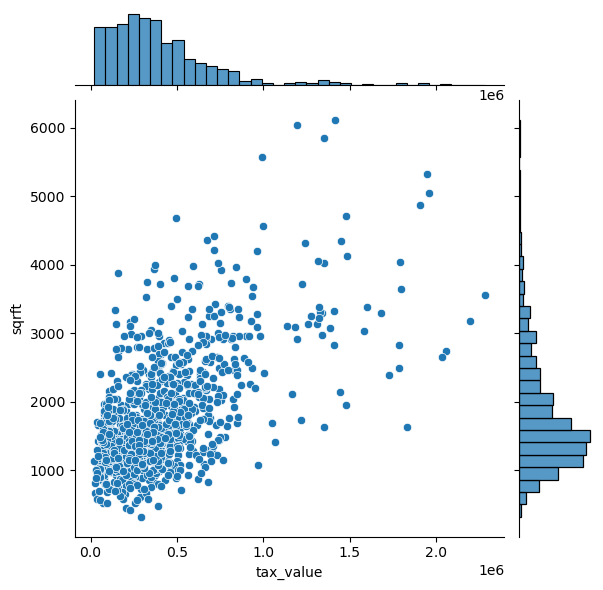

In [12]:
sns.jointplot('tax_value','sqrft',train.sample(1000))
plt.show()

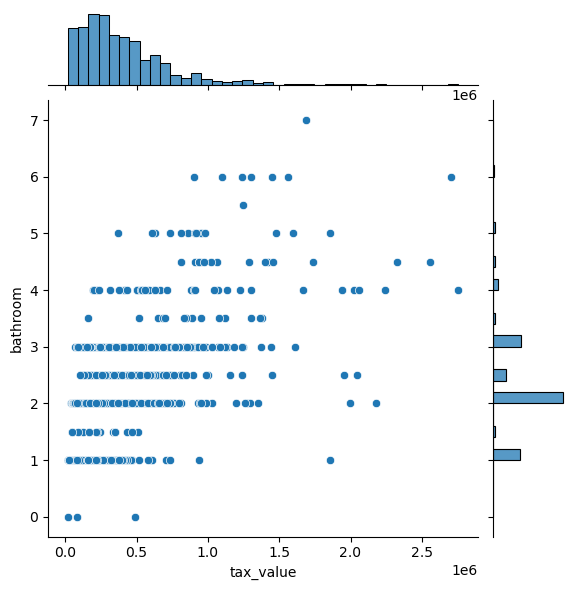

In [13]:
sns.jointplot('tax_value','bathroom',train.sample(1000))
plt.show()

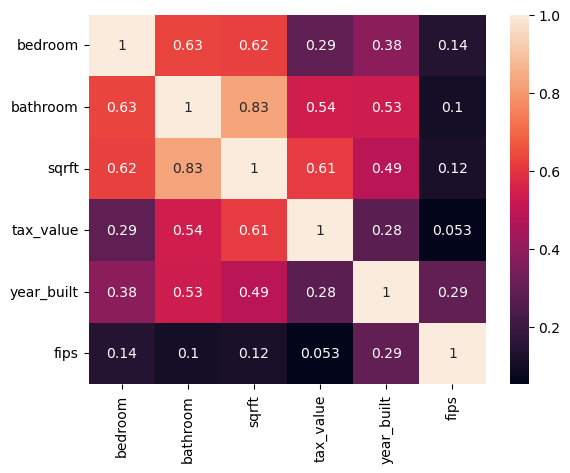

In [14]:
sns.heatmap(train.corr(), annot = True)
plt.show()

### Is there a correlation between tax value and sqrft?
    Null: There is no correlation between tax value and sqrft
    Alternate: There is a significant correlation between tax value and sqrft
    

In [15]:
alpha = 0.05

v_vs_sf = stats.spearmanr(train.tax_value, train.sqrft)
v_vs_sf

SpearmanrResult(correlation=0.5151300732092542, pvalue=0.0)

### Is the tax value dependent on the number of bathrooms?
    Null: Tax value and the number of bathrooms are independent of one another.
    Alternate: The two values are dependent on each other.

In [16]:
stats.ttest_ind(train.tax_value, train.bathroom, alternative = 'two-sided')

Ttest_indResult(statistic=228.74788437149323, pvalue=0.0)

### Is Tax value dependent on FIPS?
    Null: No, tax value is independent of FIPS
    Alternate: Yes, there is a dependency between the two values

In [17]:
stats.ttest_ind(train.tax_value, train.fips, alternative = 'two-sided')

Ttest_indResult(statistic=225.4111346543803, pvalue=0.0)

### Is Tax value dependent on the number of bedrooms?
    Null: No, tax value is independent of the number of bedrooms
    Alternate: Yes, there is a dependency between the two values

In [18]:
stats.ttest_ind(train.tax_value, train.bedroom, alternative = 'two-sided')

Ttest_indResult(statistic=228.74729028221427, pvalue=0.0)